## Purpose of Notebook

- Last update: 28 Jun 2021

Study *Local Outlier factor*

In [70]:
import numpy as np
import matplotlib.pyplot as pl

from sklearn.datasets import make_moons,\
                             make_blobs,\
                             samples_generator,\
                             make_friedman1
from sklearn.neighbors import LocalOutlierFactor

### Generate dataset

In [34]:
# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

rng = np.random.RandomState(42)

In [3]:
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

In [4]:
lof = LocalOutlierFactor(n_neighbors=30, contamination= outliers_fraction)

In [46]:
X_w_outlier = np.concatenate([datasets[0], rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)
y_pred = lof.fit_predict(X_w_outlier)

In [59]:
((y_pred>0) == (lof.negative_outlier_factor_ > -2.7)).sum()

298

(array([  1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   2.,   4.,   1.,   1.,   1.,   3.,
          3.,   4.,   3.,   3.,   1.,   2.,   4.,   2.,   3.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          7.,   3.,  14.,  28.,  51., 153.]),
 array([-8.22056428, -8.07532489, -7.9300855 , -7.78484611, -7.63960672,
        -7.49436733, -7.34912794, -7.20388855, -7.05864916, -6.91340977,
        -6.76817039, -6.622931  , -6.47769161, -6.33245222, -6.18721283,
        -6.04197344, -5.89673405, -5.75149466, -5.60625527, -5.46101588,
        -5.31577649, -5.1705371 , -5.02529771, -4.88005832, -4.73481893,
        -4.58957955, -4.44434016, -4.29910077, -4.15386138, -4.00862199,
        -3.8633826 , -3.71814321, -3.57290382, -3.42766443, -3.28242504,
        -3.13718565, -2.99194626, -2.84670687, -2.70146748, -2.55622809,
        -2.4109887 , -2.26574932, -2.12050993, -1.97527054, -1.83003115,
 

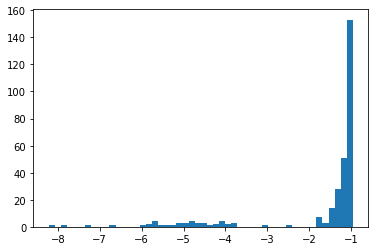

In [61]:
pl.hist(lof.negative_outlier_factor_, bins=50)

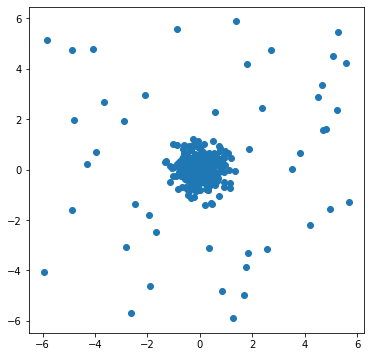

In [63]:
pl.figure(figsize=(6,6))
pl.scatter(X_w_outlier[:,0], X_w_outlier[:,1])

In [75]:
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

rng = np.random.RandomState(42)

blobs_params = dict(random_state=0, 
                    n_samples=n_inliers, 
                    n_features=2)
X, y = make_blobs(centers=[[0, 0], [0, 0]], 
                       cluster_std=0.5,
                       **blobs_params)

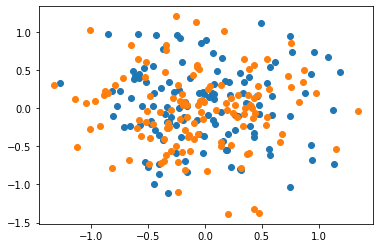

In [77]:
pl.scatter(X[y==0,0], X[y==0,1])
pl.scatter(X[y==1,0], X[y==1,1])

In [78]:
X, y = make_blobs(centers=[[-1, -1], [1, 1]], 
                       cluster_std=0.5,
                       **blobs_params)

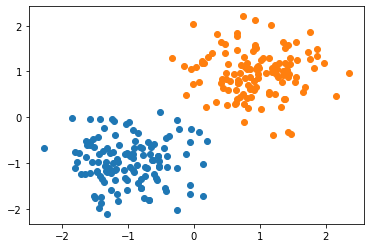

In [79]:
pl.scatter(X[y==0,0], X[y==0,1])
pl.scatter(X[y==1,0], X[y==1,1])

In [85]:
def make_target(X, degrees=1, coeffs=None):
    """ Generate target for given numerical features."""
    y = X.copy()
    if not coeffs:
        coeffs = np.random.rand(degrees)
        
    for c in zip(coeffs):
        y = c * y * y
    return y

In [88]:
make_target(X, 3).shape

(255, 2)

In [84]:
(X * X).shape

(255, 2)

In [ ]:
X.cop